# FSDS24 - Week 1, Lab 2: Exploring bivariate relationships

In this lab, you will be encouraged to explore the relationships between two variables in the data set. This will involve some data cleaning in addition to any statistical routines. You are welcome to use the same data as in the previous lab and to borrow code from the virtual walkthrough as well as from the last lab. 

The important distinctions to make below are whether we are dealing with continuous or categorical data and whether the continuous data should be considered by value (parametric) or by rank order (non-parametric). You are again welcome to process any column in the data set for this as well as to filter the data according to any goals that you might have for inquiry. There is no need to develop a specific research question at this time, but you should be considering research questions as a form of motivation when exploring this data. 

On Friday October 18th you will be encouraged to share these results with your group during the first part of the tutorial. 

# Exercise 1. A bivariate correlation

- Locate two numeric varaibles within the columns. 
- Filter the data so that you only have valid columns according to some reasonable logic.
- Report on the key measures of central tendency (mean, median, and standard deviation; mode might not be relevant for numeric data due to resolution issues)
- Produce a JointPlot or a ScatterPlot for these two varaibles. 
 - Unlike the Iris Data, we would not assume that your data will be faceted, though it might be depending on your question. 
 - Consider whether a parametric or non-parametric correlation is more suitable. 
 - Perform a correlation (Pearson product moment or Spearman's Rank Order correlation) and report the results. 
   - You can perform both and explain the difference if you are unsure or believe that both might be suitable. 

In this case, we would prefer that you select variables which you think might have some meaningful relationship to each other. Prior to your analysis, introduce your variables and explain why a relationship between them is tenable. Then when you select your bivariate relationship to explore based on the PairGrid. You do not need to write the specific null hypothesis but it might help your wording. In practice, we rarely state the null explicitly but instead often assert a hypothesis that implies the null hypothesis.

Thereafter, you are welcome to explore other relationships which might be tenable or significant but we encourage you to first think deductively. 

## BEGIN MY WORK
### Imports and styling

In [23]:
import pandas as pd
import seaborn as sns

from scipy import stats

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

Let's start by loading in the Stack Exchange movie data and presenting some summary statistics.

In [17]:
stack_df = pd.read_feather("data/movies_stack_df.feather")
print(stack_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64054 entries, 0 to 64053
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     64054 non-null  object        
 1   PostTypeId             64054 non-null  object        
 2   AcceptedAnswerId       13634 non-null  object        
 3   CreationDate           64054 non-null  datetime64[ns]
 4   Score                  64054 non-null  int64         
 5   ViewCount              22570 non-null  float64       
 6   Body                   64054 non-null  object        
 7   OwnerUserId            62148 non-null  object        
 8   LastEditorUserId       40154 non-null  object        
 9   LastEditDate           40848 non-null  datetime64[ns]
 10  LastActivityDate       64054 non-null  datetime64[ns]
 11  Title                  22570 non-null  object        
 12  Tags                   22570 non-null  object        
 13  A

In [18]:
stack_df.describe()

,CreationDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
count,64054,64054.000000,2.257000e+04,40848,64054,22570.000000,64054.000000,4886.000000,2080,68
mean,2017-01-28 07:30:11.645309952,7.262966,7.704065e+03,2017-09-29 02:42:58.998855424,2017-08-23 05:14:14.532300032,1.640939,1.576888,0.000614,2018-03-01 01:13:03.962836992,2016-09-06 08:22:45.394588160
min,2011-10-03 15:29:31.590000,-24.000000,6.000000e+00,2011-12-01 01:28:28.097000,2011-10-04 18:17:13.013000,0.000000,0.000000,0.000000,2012-05-11 12:07:26.233000,2013-01-07 16:46:19.967000
25%,2015-02-24 16:08:22.124000,1.000000,4.220000e+02,2015-12-29 13:49:01.824000,2015-11-18 07:26:38.204499968,1.000000,0.000000,0.000000,2017-11-27 08:27:23.398500096,2014-07-31 11:56:58.958000128
50%,2017-01-05 17:55:53.952999936,4.000000,1.428000e+03,2017-07-03 14:04:47.221999872,2017-06-07 07:15:49.952999936,1.000000,1.000000,0.000000,2018-01-19 13:25:36.808499968,2016-04-12 13:53:40.111500032
75%,2018-12-11 20:24:26.234499840,9.000000,5.138000e+03,2019-11-05 05:49:14.064000,2019-05-20 05:03:03.467749888,2.000000,2.000000,0.000000,2018-05-02 11:12:56.732749824,2018-10-16 13:55:45.997250048
max,2023-09-02 22:53:45.120000,326.000000,1.528888e+06,2023-09-02 23:52:04.107000,2023-09-02 23:52:04.107000,19.000000,31.000000,1.000000,2023-09-02 06:19:35.427000,2023-03-08 16:46:15.337000
std,NaN,11.699989,2.936640e+04,NaN,NaN,1.445729,2.440911,0.024774,NaN,NaN


Off rip, I'm interested in the relationship between view count and score. Intuitively (deductively) I'd expect these variables to be positively correlated.

Unfortunately, looking at data wrangler shows that `ViewCount` values are missing 65% of the time. The [schema documentation](https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede) doesn't specify a default (I'm guessing 0, but can't confirm). So instead I'm going to look at the relationship between `Score` and `CommentCount`.

Let's highlight these values from the `.describe()` call.

In [19]:
bivar_corr_df = stack_df[['Score', 'CommentCount']]
bivar_corr_df.describe().loc[['mean', '50%', 'std']]


,Score,CommentCount
mean,7.262966,1.576888
50%,4.000000,1.000000
std,11.699989,2.440911


Obviously these values are distributed on very different scales, so there's no sense in trying any sort of means-equivalence test. But we can take a look at a pairplot to eyeball correlation, first.

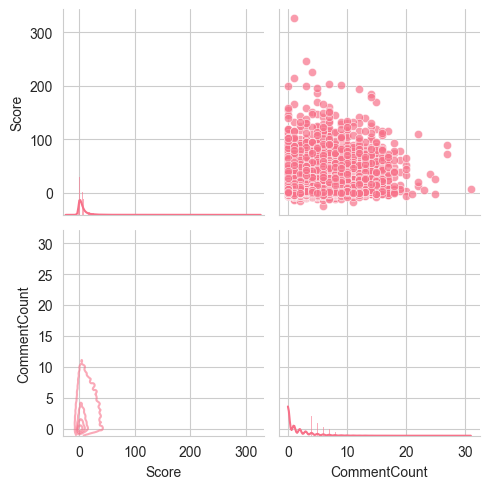

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.PairGrid(bivar_corr_df, height=2.5)

# Show scatterplot in the top corner
fig.map_upper(sns.scatterplot, s=35, alpha=0.7)

# Show KDE plots in bottom corner
fig.map_lower(sns.kdeplot, levels=5, alpha=0.6)

# Show histograms across diagonal
fig.map_diag(sns.histplot, kde=True, alpha=0.6)

plt.tight_layout()

plt.show()

Doesn't actually look great. Let's try a nonparametric test for correlation, like Spearman Rho:

In [25]:
corr, p_value = stats.spearmanr(
    bivar_corr_df['Score'],
    bivar_corr_df['CommentCount']
)
print(f"Correlation: {corr:.2f}")
print(f"Significance: {p_value:.2f}")

Correlation: 0.31
Significance: 0.00


We might as well compare with a Pearson parametric correlation, though the assumptions aren't really met, so we'd have to take this result with a grain of salt:

In [26]:
corr, p_value = stats.pearsonr(
    bivar_corr_df['Score'],
    bivar_corr_df['CommentCount']
)
print(f"Correlation: {corr:.2f}")
print(f"Significance: {p_value:.2f}")

Correlation: 0.34
Significance: 0.00


Pearson shows slightly higher correlation—still not strong correlation, though.

## END MY WORK

# Exercise 2. Considering categorical variables 

How might we locate a categorical varaible within the Movie Stack Exchange? What about two? Would you be able to construct your own Categorical variable? Here are some ideas for what might suit as a variable:
- Binary:
  - Presence or absence of a word in the BodyText
  - A 'cut point' on a distribution, such as all those above and below the elbow on a steep distribution.
- Multinomial: Different types of PostTypeID (though in fairness, it really ends up functionally binary as its mostly Questions and Answers)
  - Different 'roles' of users (we will see more of this tomorrow), but one role might be to post a question and one might be to only post an answer,
  - Presence of specific tags (note: that a post can have multiple tags so one would need to ensure these are _mutually exclusive_),
  - Different 'eras' of posts (we will see more of this next week when we explore data over a time series, but for now one might consider posts by year naively)

Find either two Categorical variables, or a Categorical variable and a continuous variable. Then, make a comparison test or a test of independence. Justify whether your means comparison test is parametric or non-parametric. 

Below you should: 
- Explain your two variables first in text: I chose X because ... and Y because .... Posit why you believe there should or should not be a relationship between the two variables in text.
- Then perform the analysis, first by doing an exploratory analysis reporting on the N for each group or category as well as key measures of central tendency. 
- Then show a plot or table that summarises the two variables jointly. This might be a box-plot, a bar chart, or a cross tab (for two categorical variables). 
- Then report the statistical test and comment on the results. 

Again, like in the analysis above, we recommend that you do not 'seek out' a relationship that is significant but start deductively from what you might understand about the nature of online communication, your own intuition, and where possible or appropriate, existing literature. We would be just as happy to see null findings done well as to see a significant value. 



## BEGIN MY WORK
I'm going to construct a categorical variable for the first tag in `Tags`, which is probably the most relevant tag.

In [35]:
stack_df["FirstTag"] = stack_df["Tags"].dropna().map(lambda x: x.split("><")[0].strip("<>"))
stack_df[['Tags', 'FirstTag']].head()

,Tags,FirstTag
0,<wedding-crashers>,wedding-crashers
1,None,NaN
2,<analysis><star-wars>,analysis
3,<comedy><the-pink-panther>,comedy
4,<plot-explanation><analysis><ending><the-tree-...,plot-explanation


In [42]:
stack_df.value_counts("FirstTag")

FirstTag
plot-explanation                      8186
character                             1775
analysis                              1010
identify-this-movie                    842
dialogue                               629
                                      ... 
national-treasure-book-of-secrets        1
nausicaa-of-the-valley-of-the-wind       1
bobs-burgers                             1
need-for-speed                           1
pumping-iron                             1
Name: count, Length: 1529, dtype: int64

This categorical variable has 1529 distinct values with a long tail. Let's apply an "other" group.

In [48]:
def categorical_apply_other_grouping(series: pd.Series, n_to_keep: int = 5) -> pd.Series:
    # Get the counts of each category
    value_counts = series.value_counts()
    
    # Identify the top n_to_keep most common values
    top_n = value_counts.nlargest(n_to_keep)
    
    # Aggregate all other values as "other"
    other_count = value_counts.iloc[n_to_keep:].sum()
    
    # Create a new series that includes the top 5 and "other"
    top_n['other'] = other_count
    
    return top_n

In [50]:
categorical_apply_other_grouping(stack_df["FirstTag"], 5)

FirstTag
plot-explanation        8186
character               1775
analysis                1010
identify-this-movie      842
dialogue                 629
other                  10128
Name: count, dtype: int64

We need to map these categories to assign all the other first tags to the "other" group.

In [58]:
n_to_keep = 5
top_n_tags = stack_df["FirstTag"].value_counts().nlargest(n_to_keep).index

print(top_n_tags.tolist())

['plot-explanation', 'character', 'analysis', 'identify-this-movie', 'dialogue']


In [57]:
# Remap the tags to the top 5 and "other" otherwise
stack_df["FirstTagGrouped"] = stack_df["FirstTag"].map({tag: tag for tag in top_n_tags}).fillna("other")

stack_df[['FirstTag', 'FirstTagGrouped']].head()

,FirstTag,FirstTagGrouped
0,wedding-crashers,other
1,NaN,other
2,analysis,analysis
3,comedy,other
4,plot-explanation,plot-explanation


Let's straightforwardly compare this categorical variable I've created with the post type label, which we can get like we did in Lab 1 with a remapping.

In [59]:
# Copied over from the Week_01_1_VW notebook
new_labels = {
    '1': "Question",
    '2': "Answer", 
    '3': "Orphaned tag wiki",
    '4': "Tag wiki excerpt",
    '5': "Tag wiki",
    '6': "Moderator nomination", 
    '7': "Wiki placeholder"
}

# There are in fact 15 tags, but our data only includes the first seven. 
# Don't "clobber" PostTypeId column -- create new column using .map
stack_df["PostTypeLabel"] = stack_df["PostTypeId"].map(new_labels)

stack_df[['PostTypeId', 'PostTypeLabel']].head()

,PostTypeId,PostTypeLabel
0,1,Question
1,2,Answer
2,1,Question
3,1,Question
4,1,Question


Let's build a frequency table comparing these two categorical variables to each other.

In [60]:
pd.crosstab(stack_df["FirstTagGrouped"], stack_df["PostTypeLabel"])

PostTypeLabel,Answer,Moderator nomination,Question,Tag wiki,Tag wiki excerpt,Wiki placeholder
FirstTagGrouped,,,,,,
analysis,0,0,1010,0,0,0
character,0,0,1775,0,0,0
dialogue,0,0,629,0,0,0
identify-this-movie,0,0,842,0,0,0
other,37036,21,10128,2211,2211,5
plot-explanation,0,0,8186,0,0,0


So basically everything is a `Question`. Huh. Is there a particular category of first tag that predicts `Answer`, or is it spread disparately across tags?

In [70]:
stack_df.loc[stack_df["PostTypeLabel"] == "Answer"]["Tags"].unique()

array([None], dtype=object)

So answers don't have tags... I guess that answers my question!

Ok, how about whether the title itself is a question, i.e. ending in `?`?

In [81]:
# Replace empty titles with "", which obviously don't end with `?`
stack_df["TitleEndsWithQuestion"] = stack_df["Title"].fillna("").str.endswith("?")
stack_df[['Title', 'TitleEndsWithQuestion']].head()

,Title,TitleEndsWithQuestion
0,To what extent were the actors in Wedding Cras...,True
1,None,False
2,Evaluating characters by means of description,False
3,"Was the original ""Pink Panther"" movie intended...",True
4,What does the ending of The Tree of Life mean?,True


In [82]:
stack_df["TitleEndsWithQuestion"].value_counts(normalize=True)

TitleEndsWithQuestion
False    0.696303
True     0.303697
Name: proportion, dtype: float64

So this is an interesting distribution. Let's compare it with first tags:

In [85]:
frequency_table = pd.crosstab(stack_df["FirstTagGrouped"], stack_df["TitleEndsWithQuestion"])
frequency_table

TitleEndsWithQuestion,False,True
FirstTagGrouped,,
analysis,130,880
character,142,1633
dialogue,115,514
identify-this-movie,728,114
other,42751,8861
plot-explanation,735,7451


In [86]:
chi2, p, dof, expected = stats.chi2_contingency(frequency_table)

print(f"Chi-squared statistic: {chi2:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Degrees of freedom: {dof}")

Chi-squared statistic: 24117.602
p-value: 0.000
Degrees of freedom: 5


## END MY WORK